# Sales Analysis

#### Import libraries

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

#### 1. Merging 12 months of sales data into a single file

In [2]:
##df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir("./Sales_Data")]

merged_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    merged_data = pd.concat([merged_data, df])


#### Checking for correctness of merging

In [3]:
df1 = merged_data.copy()
df1['Order Date'] = pd.to_datetime(df1['Order Date'], errors='coerce')
merged_data.to_csv("all_data.csv", index=False)

In [4]:
specific_date = df.loc[(df['Order Date'] >= "06/01/19 00:00")]
specific_date

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Cleaning up the data

In [5]:
cleaned_df1 = df1.dropna(how='any').copy()

#### Find the month with the best sales

In [6]:
# add the sales column (quantity * price each)
# cleaned_df1['Full Price'] = cleaned_df1['Quantity Ordered'].astype('float32') * cleaned_df1['Price Each'].astype('float32')
# cleaned_df1

cleaned_df1['Quantity Ordered'] = pd.to_numeric(cleaned_df1['Quantity Ordered'])
cleaned_df1['Price Each'] = pd.to_numeric(cleaned_df1['Price Each'])

cleaned_df1['Full Price'] = cleaned_df1['Quantity Ordered'] * cleaned_df1['Price Each']

cleaned_df1['Month'] = pd.DatetimeIndex(cleaned_df1['Order Date']).month
prices_sum = cleaned_df1.groupby('Month').sum(numeric_only=True)
solution = [prices_sum['Full Price'].max()]
solution.append(prices_sum['Full Price'].idxmax())

print(solution)


[4613443.34, 12]


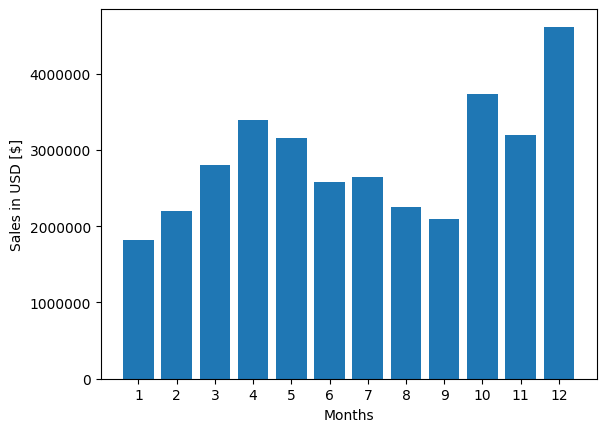

In [7]:
months = range(1, 13)
plt.ticklabel_format(style='plain')
plt.bar(months, prices_sum['Full Price'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD [$]')
plt.show()

#### What city had the highest number of sales?

In [8]:
cleaned_df1['City'] = cleaned_df1['Purchase Address'].apply(lambda x: x.split(",")[1] + x.split(",")[2])

cities_sum = cleaned_df1.groupby('City').sum(numeric_only=True)
cities_sum['Quantity Ordered'].idxmax()

' San Francisco CA 94016'

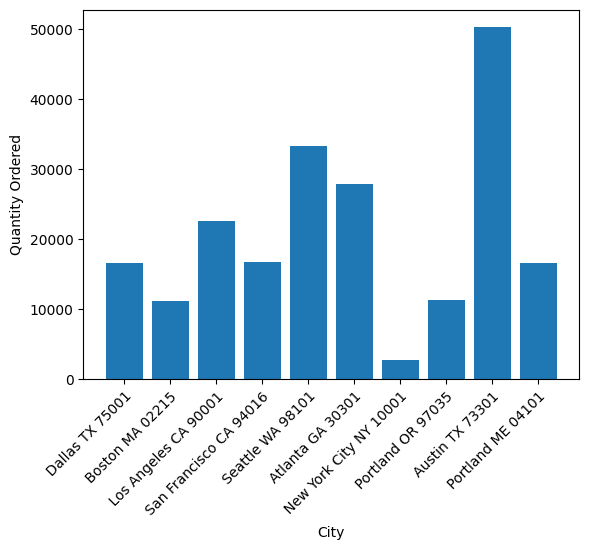

In [9]:
plt.ticklabel_format(style='plain')

cities = cleaned_df1['City'].unique()

plt.bar(cities, cities_sum['Quantity Ordered'])
plt.xticks(cities, rotation=45, ha="right", rotation_mode="anchor")
plt.xlabel('City')
plt.ylabel('Quantity Ordered')
plt.show()

#### What time should we display advertisements to maximize likelihood of customer's buying product?

In [10]:
cleaned_df1['Hour'] = cleaned_df1['Order Date'].dt.hour
cleaned_df1

hour_sales = cleaned_df1.groupby('Hour').sum(numeric_only=True)
hour_sales['Quantity Ordered'].idxmax()


19

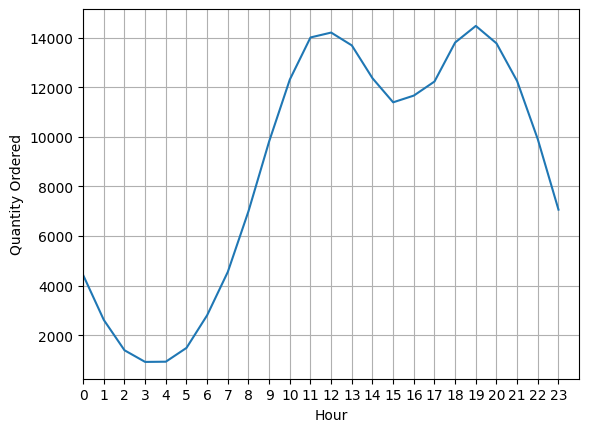

In [11]:
hours = range(0,24)

plt.ticklabel_format(style='plain')
plt.plot(hours, hour_sales['Quantity Ordered'])
plt.xticks(hours)
plt.xlim([0, 24])
plt.xlabel('Hour')
plt.ylabel('Quantity Ordered')
plt.grid()

We should display advertisements around 12 or 19 o'clock.

#### What products are most often sold together?

In [58]:
df = cleaned_df1[cleaned_df1['Order ID'].duplicated(keep=False)].copy()

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ', '.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

pairs_count = df['Grouped'].value_counts()
pairs_count.head(10)

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: Grouped, dtype: int64

#### What products sold the most?

In [122]:
df = cleaned_df1.groupby('Product').sum(numeric_only=True).copy()
#df.sort_values(by=['Quantity Ordered'], inplace=True, ascending=False)
df['Quantity Ordered'].head()

Product
20in Monitor               4129
27in 4K Gaming Monitor     6244
27in FHD Monitor           7550
34in Ultrawide Monitor     6199
AA Batteries (4-pack)     27635
Name: Quantity Ordered, dtype: int64

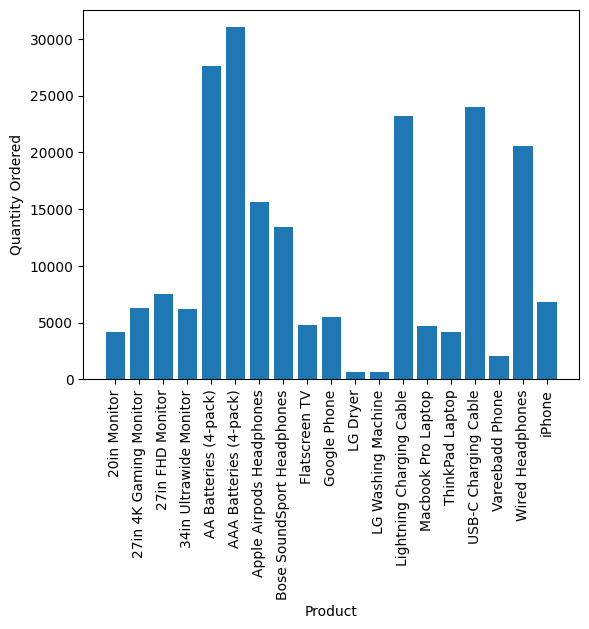

In [123]:
plt.bar(df['Quantity Ordered'].index, df['Quantity Ordered'])
plt.xticks(df['Quantity Ordered'].index, rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

Compare quantity ordered with prices of products

[Text(0.0, 0, '20in Monitor'),
 Text(1.0, 0, '27in 4K Gaming Monitor'),
 Text(2.0, 0, '27in FHD Monitor'),
 Text(3.0, 0, '34in Ultrawide Monitor'),
 Text(4.0, 0, 'AA Batteries (4-pack)'),
 Text(5.0, 0, 'AAA Batteries (4-pack)'),
 Text(6.0, 0, 'Apple Airpods Headphones'),
 Text(7.0, 0, 'Bose SoundSport Headphones'),
 Text(8.0, 0, 'Flatscreen TV'),
 Text(9.0, 0, 'Google Phone'),
 Text(10.0, 0, 'LG Dryer'),
 Text(11.0, 0, 'LG Washing Machine'),
 Text(12.0, 0, 'Lightning Charging Cable'),
 Text(13.0, 0, 'Macbook Pro Laptop'),
 Text(14.0, 0, 'ThinkPad Laptop'),
 Text(15.0, 0, 'USB-C Charging Cable'),
 Text(16.0, 0, 'Vareebadd Phone'),
 Text(17.0, 0, 'Wired Headphones'),
 Text(18.0, 0, 'iPhone')]

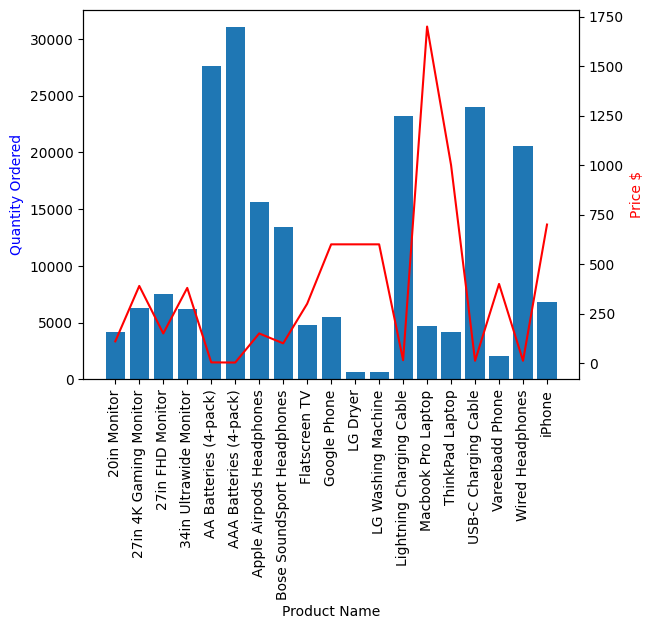

In [124]:
df2 = cleaned_df1.groupby('Product').mean(numeric_only=True).copy()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(df['Quantity Ordered'].index, df['Quantity Ordered'])
ax2.plot(df['Quantity Ordered'].index, df2['Price Each'], color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price $', color='r')
ax1.set_xticks(df['Quantity Ordered'].index)
ax1.set_xticklabels(df['Quantity Ordered'].index, rotation='vertical')
